## Multi-class classification

This exercise is described in [ex3.pdf](data/ml-ex3/ex3.pdf).

In [1]:
import numpy as np
import scipy as sp
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report

%matplotlib inline

### Hand-written digits dataset

In [2]:
# Load the hand-written digits dataset
digits = sio.loadmat('/data/elastic-notebook/data/krasser-ml/ml-ex3/ex3data1.mat')

In [3]:
# Digit image data (5000 images with 400 features/pixels)
X = digits['X']

# Digit classes (1-10) where digit 0 is assigned class 10
y = digits['y'].ravel()

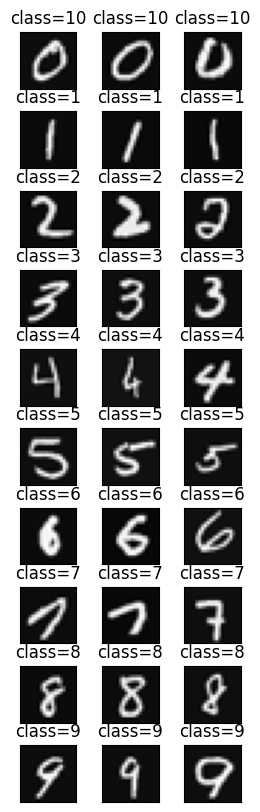

In [4]:
# Plot three samples from each class
n_rows = 10
n_cols = 3

selected = np.linspace(0, X.shape[0] - 1, n_rows * n_cols, dtype='int16')

plt.figure(figsize=(n_cols, n_rows))
plt.subplots_adjust(hspace=.4)

for i, idx in enumerate(selected):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X[idx].reshape((20,20), order='F'), cmap=plt.cm.gray)
    plt.title(f'class={y[idx]}')
    plt.xticks(())
    plt.yticks(())

### Logistic regression

In [5]:
# Train a logistic regression classifier with C=1.0 (inverse regularization strength)
clf = LogisticRegression(C=1.0, solver='newton-cg')
clf.fit(X, y)

LogisticRegression(solver='newton-cg')

In [6]:
# Classification accuracy on training set
clf.score(X, y)

0.9624

In [7]:
# Train a logistic regression classifier, running 
# built-in cross validation for selecting the best 
# C value 
clf_cv = LogisticRegressionCV(Cs=[1e-1, 1e0, 1e1], solver='newton-cg')
clf_cv.fit(X, y)

LogisticRegressionCV(Cs=[0.1, 1.0, 10.0], solver='newton-cg')

In [8]:
# Classification accuracy on training set 
# using the model that was selected during 
# cross-validation
clf_cv.score(X, y)

0.9624

### Neural networks

In [9]:
# Load the parameters of a pre-trained neural network
weights = sio.loadmat('/data/elastic-notebook/data/krasser-ml/ml-ex3/ex3weights.mat')

Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

Theta1.shape, Theta2.shape

((25, 401), (10, 26))

In [10]:
# Number of examples (first dimension of design matrix X)
n_examples = X.shape[0]

# sigmoid function
sigmoid = sp.special.expit

In [11]:
# Input layer data
A1 = np.c_[np.ones(n_examples), X]

In [12]:
# Hidden layer activations
Z2 = A1.dot(Theta1.T)
A2 = np.c_[np.ones(n_examples), sigmoid(Z2)]

In [13]:
# Output layer activations
Z3 = A2.dot(Theta2.T)
A3 = sigmoid(Z3)

In [14]:
# Predicted class is index of highest value per row + 1
y_pred = np.argmax(A3, axis=1) + 1

In [15]:
# Print classification report showing the main classification metrics
print(classification_report(y, y_pred, target_names=['1','2','3','4','5','6','7','8','9','10'], digits=4))

              precision    recall  f1-score   support

           1     0.9684    0.9820    0.9752       500
           2     0.9818    0.9700    0.9759       500
           3     0.9776    0.9600    0.9687       500
           4     0.9699    0.9680    0.9690       500
           5     0.9723    0.9840    0.9781       500
           6     0.9782    0.9860    0.9821       500
           7     0.9778    0.9700    0.9739       500
           8     0.9781    0.9820    0.9800       500
           9     0.9657    0.9580    0.9618       500
          10     0.9822    0.9920    0.9871       500

    accuracy                         0.9752      5000
   macro avg     0.9752    0.9752    0.9752      5000
weighted avg     0.9752    0.9752    0.9752      5000



In [16]:
# try with a different function
softmax = sp.special.softmax

In [17]:
# Input layer data
A1 = np.c_[np.ones(n_examples), X]

In [18]:
# Hidden layer activations
Z2 = A1.dot(Theta1.T)
A2 = np.c_[np.ones(n_examples), softmax(Z2)]

In [19]:
# Output layer activations
Z3 = A2.dot(Theta2.T)
A3 = softmax(Z3)

In [20]:
# Predicted class is index of highest value per row + 1
y_pred = np.argmax(A3, axis=1) + 1

In [21]:
# Print classification report showing the main classification metrics
print(classification_report(y, y_pred, target_names=['1','2','3','4','5','6','7','8','9','10'], digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000       500
           2     0.0000    0.0000    0.0000       500
           3     0.0000    0.0000    0.0000       500
           4     0.0000    0.0000    0.0000       500
           5     0.0000    0.0000    0.0000       500
           6     0.0000    0.0000    0.0000       500
           7     0.0000    0.0000    0.0000       500
           8     0.0000    0.0000    0.0000       500
           9     0.0000    0.0000    0.0000       500
          10     0.0998    0.9980    0.1815       500

    accuracy                         0.0998      5000
   macro avg     0.0100    0.0998    0.0182      5000
weighted avg     0.0100    0.0998    0.0182      5000



/home/zl20/kishu-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zl20/kishu-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zl20/kishu-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
